# Step 1: Importing and Merging Data

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt

In [154]:
train= pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [155]:
train.shape

(891, 21)

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [157]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In [158]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


In [159]:
test.shape

(418, 20)

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

In [161]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,415.000000,415.000000,415.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,643.684337,29.616241,2.257831
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,379.508988,13.400225,0.847577
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,2.000000,0.170000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,316.500000,21.000000,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,641.000000,27.000000,3.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,965.500000,37.000000,3.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1313.000000,67.000000,3.000000


In [162]:
# Define the columns to keep
columns_to_keep = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age','Survived', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Keep only the specified columns in both train and test datasets
train = train[columns_to_keep]
columns_to_keep.remove('Survived')
test = test[columns_to_keep]

# Check if the columns are correctly retained
print(train.head())
print(test.head())


   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  Survived  SibSp  Parch            Ticket     Fare Cabin  \
0    male  22.0       0.0      1      0         A/5 21171   7.2500   NaN   
1  female  38.0       1.0      1      0          PC 17599  71.2833   C85   
2  female  26.0       1.0      0      0  STON/O2. 3101282   7.9250   NaN   
3  female  35.0       1.0      1      0            113803  53.1000  C123   
4    male  35.0       0.0      0      0            373450   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
  

### Correcting Datatype for the variable in data

Few Columns' datatype are defaulted as int64 but they are catergorical in nature 

In [163]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Survived     891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


Pclass

In [165]:
train['Pclass'].value_counts(ascending=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

it's Catergorical data

In [166]:
print("Train['Pclass']  : ",train.Pclass.dtype)
print("Test['Pclass']   : ",test.Pclass.dtype)

Train['Pclass']  :  int64
Test['Pclass']   :  int64


In [167]:
train['Pclass']=train['Pclass'].astype('object')
test['Pclass']=test['Pclass'].astype('object')

In [168]:
print("Train['Pclass']  : ",train.Pclass.dtype)
print("Test['Pclass']   : ",test.Pclass.dtype)

Train['Pclass']  :  object
Test['Pclass']   :  object


Survived

In [169]:
train['Survived'].value_counts(ascending=False)

Survived
0.0    549
1.0    342
Name: count, dtype: int64

It's Catergorical data

In [170]:
print("Train['Survived']  : ",train.Survived.dtype)

Train['Survived']  :  float64


## Variable are correctly classified & added in dataset

# Decoding Values

Pclass

In [171]:
train['Pclass'] = train['Pclass'].replace({ 1 : '1st', 2: '2nd',3: '3rd'}).astype('category')
test['Pclass'] = test['Pclass'].replace({ 1 : '1st', 2: '2nd',3: '3rd'}).astype('category')

In [172]:
train['Pclass'].value_counts(ascending=False)

Pclass
3rd    491
1st    216
2nd    184
Name: count, dtype: int64

In [173]:
test['Pclass'].value_counts(ascending=False)

Pclass
3rd    218
1st    107
2nd     93
Name: count, dtype: int64

Embarked

In [174]:
train['Embarked'] = train['Embarked'].replace({ 'C' : 'Cherbourg', 'Q': 'Queenstown','S': 'Southampton'}).astype('object')
test['Embarked'] = test['Embarked'].replace({ 'C' : 'Cherbourg', 'Q': 'Queenstown','S': 'Southampton'}).astype('object')

In [175]:
train['Embarked'].value_counts(ascending=False)

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [176]:
test['Embarked'].value_counts(ascending=False)

Embarked
Southampton    270
Cherbourg      102
Queenstown      46
Name: count, dtype: int64

## Variable are all decoded & added in dataset

# Step 2: Inspecting the Dataframe

In [177]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,Survived,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3rd,"Braund, Mr. Owen Harris",male,22.0,0.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,3rd,"Heikkinen, Miss. Laina",female,26.0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,1,0,113803,53.1000,C123,Southampton
4,5,3rd,"Allen, Mr. William Henry",male,35.0,0.0,0,0,373450,8.0500,NaN,Southampton


In [178]:
train.shape

(891, 12)

In [179]:
train.describe()

,PassengerId,Age,Survived,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.383838,0.523008,0.381594,32.204208
std,257.353842,14.526497,0.486592,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,1.000000,8.000000,6.000000,512.329200


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   Survived     891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(3), int64(3), object(5)
memory usage: 77.7+ KB


We found few missing values in few of Columns

In [181]:
round(test.isnull().sum()*100/len(test),2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [182]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [183]:
round(train.isnull().sum()*100/len(train),2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
Survived        0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [184]:
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
Survived         0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Impute Data for missing value 

Cabin

In [185]:
round(test.Cabin.isnull().sum()*100/len(test),2)

78.23

In [186]:
test.Cabin.isnull().sum()

327

In [187]:
pd.set_option('display.max_rows', None)
test.Cabin.value_counts(ascending=False)

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
F4                 2
C6                 2
C23 C25 C27        2
C31                2
C101               2
C80                2
E34                2
C78                2
C116               2
C22 C26            1
C32                1
B69                1
F E46              1
B26                1
D                  1
D21                1
C86                1
D37                1
C85                1
B78                1
C106               1
F E57              1
C39                1
D38                1
D40                1
C7                 1
B41                1
D28                1
B24                1
B52 B54 B56        1
F2                 1
E39 E41            1
E50                1
E60                1
D10 D12            1
B51 B53 B55        1
A18                1
F33                1
B58 B60            1
B11                1
A11                1
B36                1
A21    

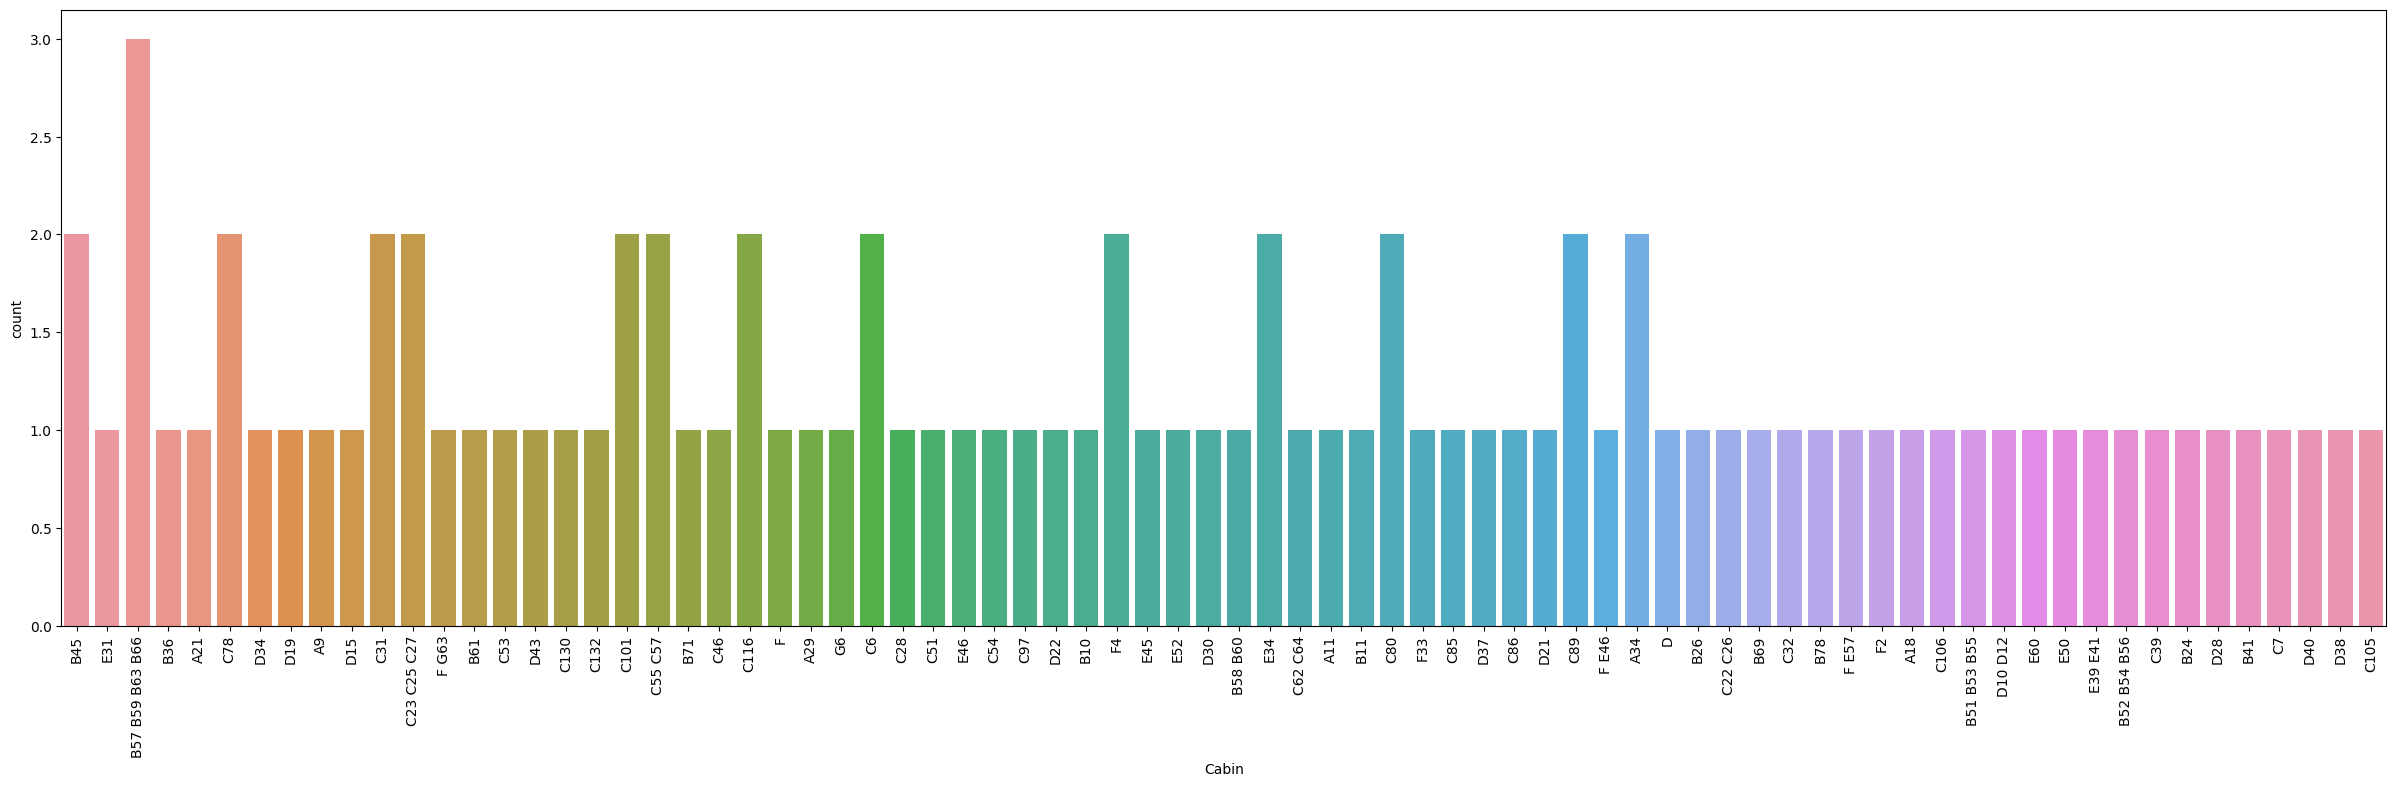

In [188]:
plt.figure(figsize=(30,8))
sns.countplot(x='Cabin',data=test)
plt.xticks(rotation=90)
plt.show()

Let replace missing value with a variable X, which means it's Unknown 

In [189]:
test['Cabin'] = test['Cabin'].replace(np.nan,'X')

In [190]:
test['Cabin'].isnull().sum()

0

In [191]:
train.Cabin.value_counts(ascending=False)

Cabin
B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58    

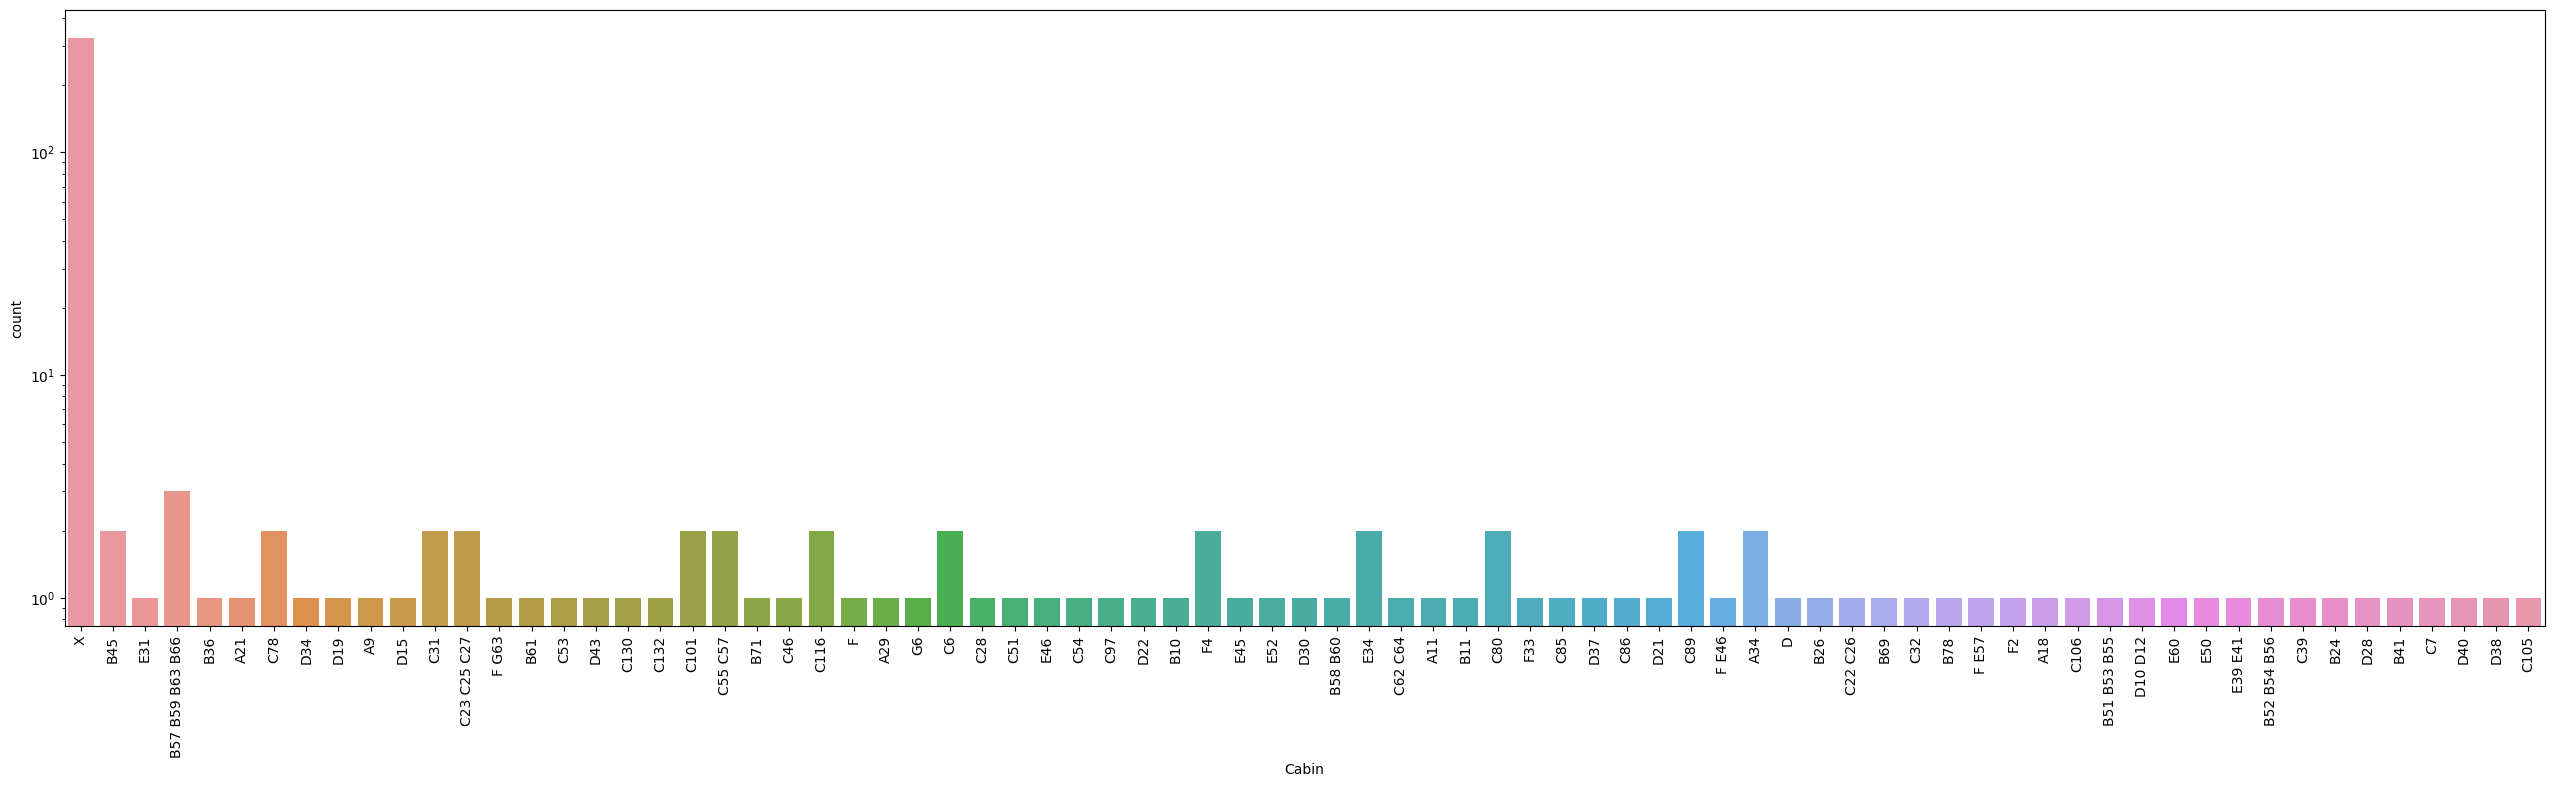

In [192]:
plt.figure(figsize=(32,8))
ax=sns.countplot(x='Cabin',data=test)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

Similarly, For train data 

In [193]:
round(train.Cabin.isnull().sum()*100/len(train),2)

77.1

In [194]:
train.Cabin.isnull().sum()

687

In [195]:
pd.set_option('display.max_rows', None)
train.Cabin.value_counts(ascending=False)

Cabin
B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58    

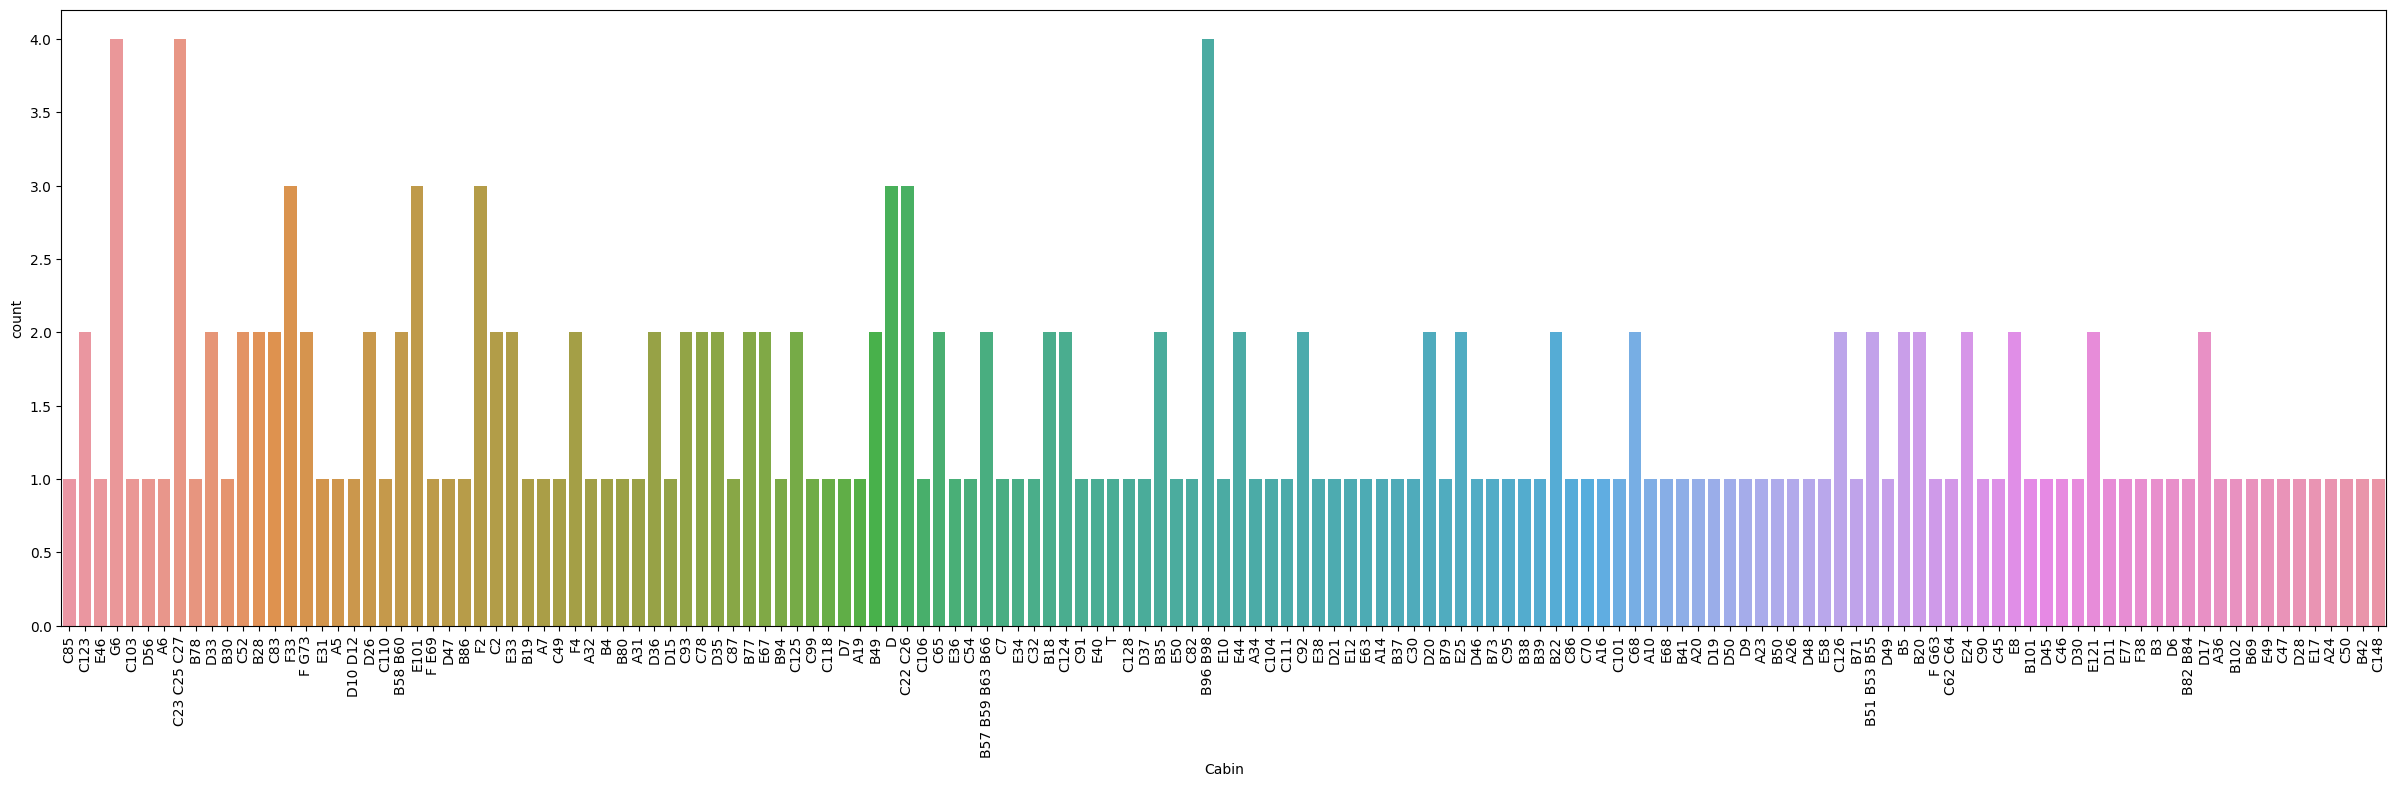

In [196]:
plt.figure(figsize=(30,8))
sns.countplot(x='Cabin',data=train)
plt.xticks(rotation=90)
plt.show()

Let replace missing value with a variable X, which means it's Unknown

In [197]:
train['Cabin'] = train['Cabin'].replace(np.nan,'X')

In [198]:
train['Cabin'].isnull().sum()

0

In [199]:
test.Cabin.value_counts(ascending=False)

Cabin
X                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
C55 C57              2
C101                 2
A34                  2
C23 C25 C27          2
C31                  2
F4                   2
B45                  2
C78                  2
E34                  2
C6                   2
D21                  1
B78                  1
F E46                1
C86                  1
D                    1
B26                  1
C22 C26              1
B69                  1
D37                  1
C85                  1
C32                  1
A18                  1
F E57                1
C39                  1
D38                  1
D40                  1
C7                   1
B41                  1
D28                  1
B24                  1
B52 B54 B56          1
F2                   1
E39 E41              1
E50                  1
E60                  1
D10 D12              1
B51 B53 B55          1
C106                 1
F33  

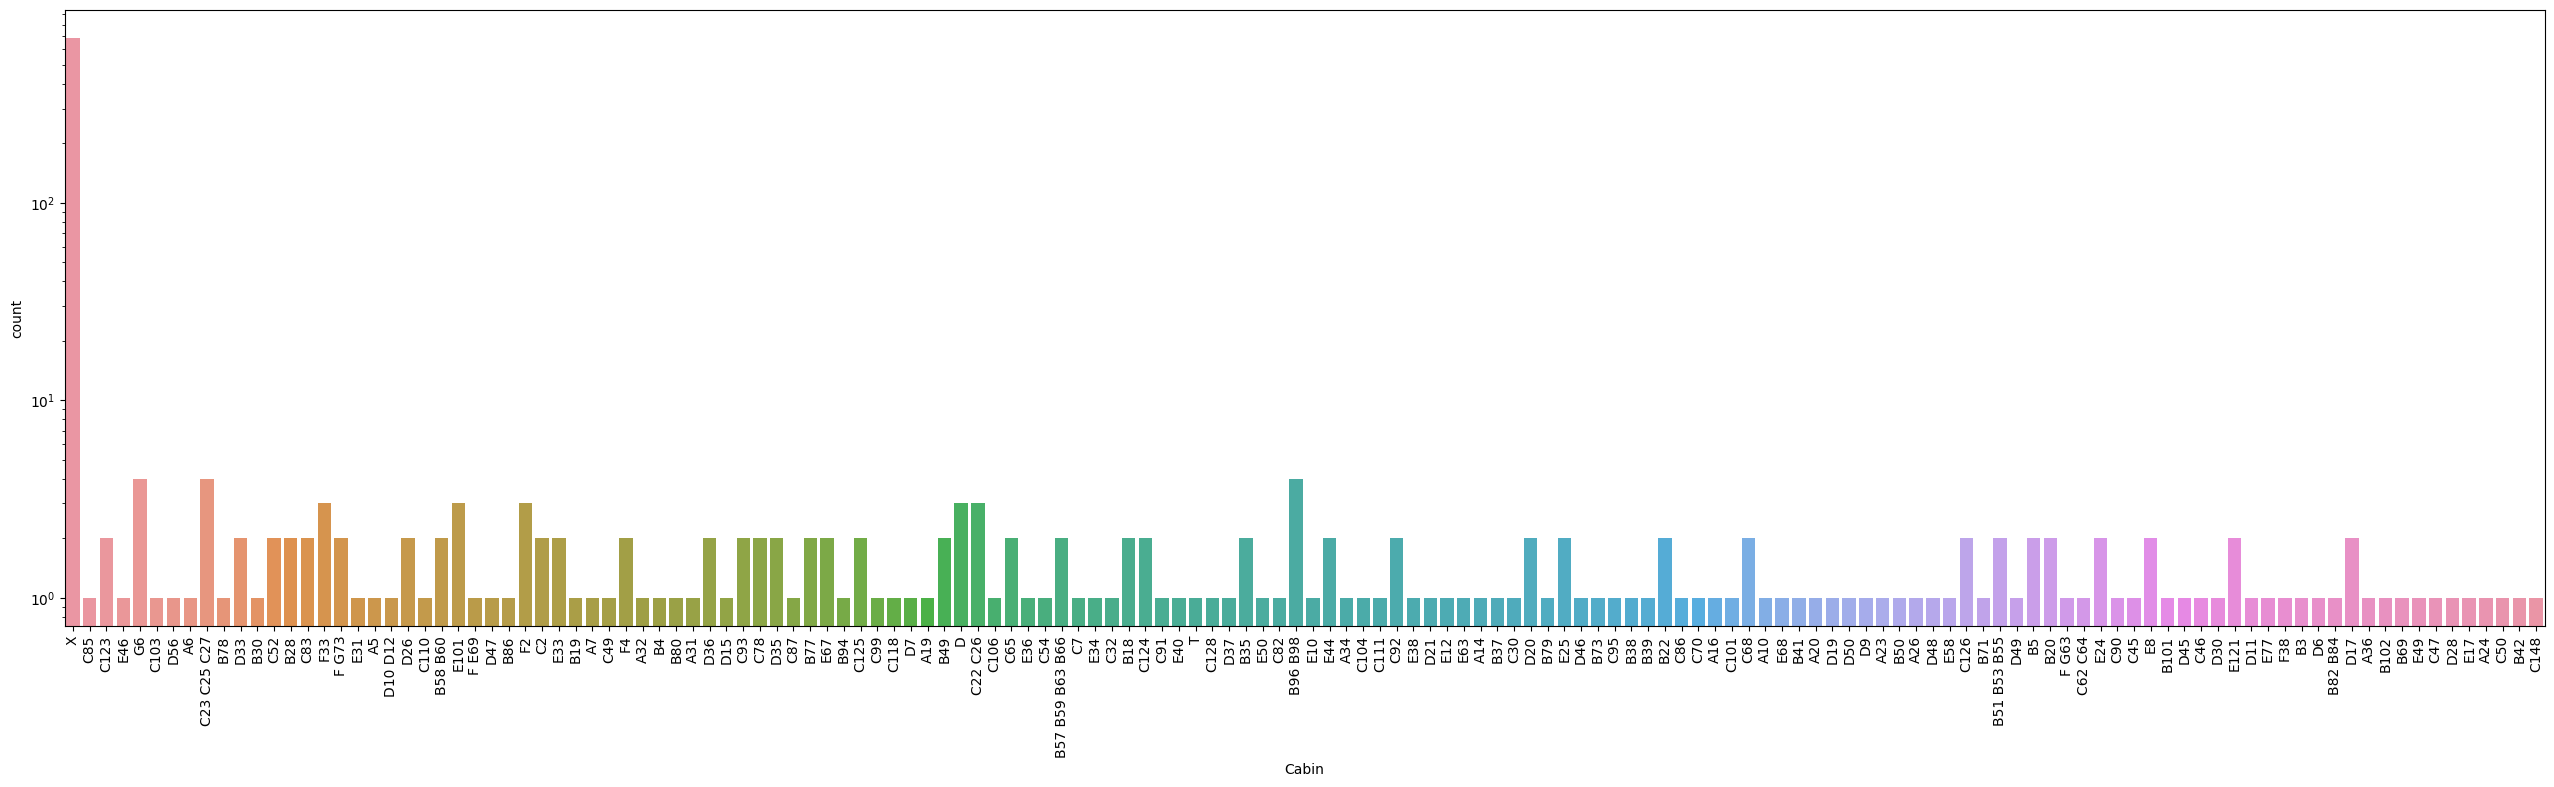

In [200]:
plt.figure(figsize=(32,8))
ax=sns.countplot(x='Cabin',data=train)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

Fare

In [201]:
round(test.Fare.isnull().sum()*100/len(test),2)

0.24

In [202]:
test.Fare.isnull().sum()

1

In [203]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

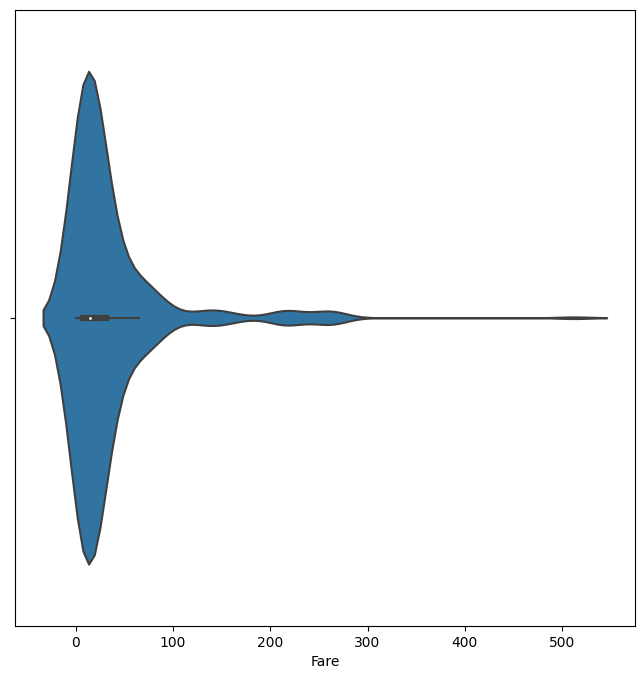

In [204]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Fare',data=test)
plt.show()

- There are outliers for this variable, hence, Median is prefered over mean

In [205]:
test['Fare'] = test['Fare'].replace(np.nan,train.Fare.median())

In [206]:
test.Fare.isnull().sum()

0

Age

In [207]:
round(train.Age.isnull().sum()*100/len(train),2)

19.87

In [208]:
train.Age.isnull().sum()

177

In [209]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

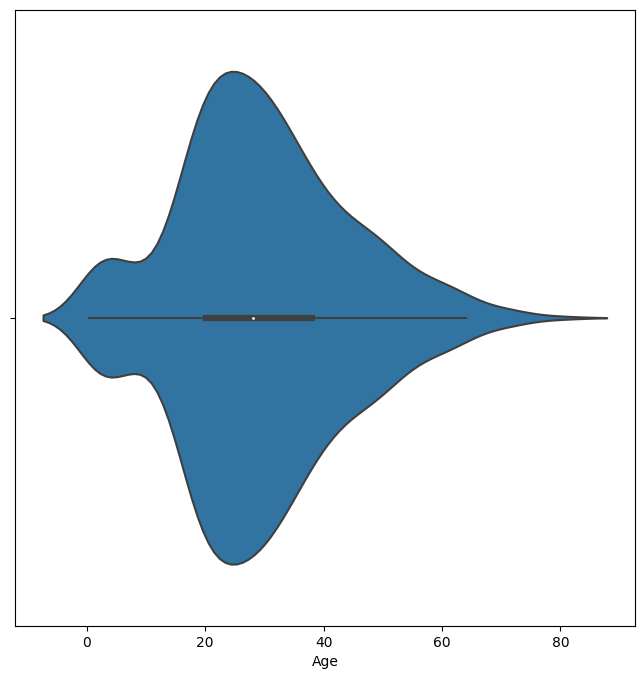

In [210]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Age',data=train)
plt.show()

-  There are outliers for this variable, hence, Median is prefered over mean

In [211]:
train['Age'] = train['Age'].replace(np.nan,train.Age.median())

In [212]:
train['Age'].isnull().sum()

0

In [213]:
round(test.Age.isnull().sum()*100/len(test),2)

20.57

In [214]:
test.Age.isnull().sum()

86

In [215]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

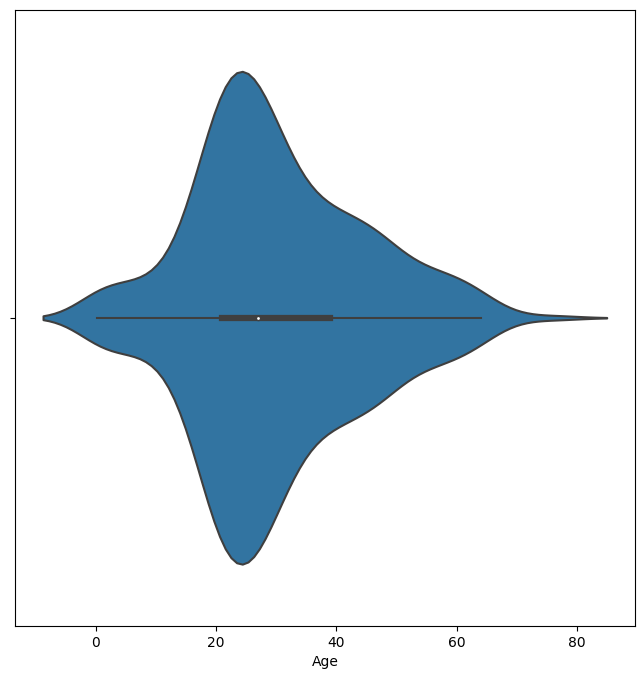

In [216]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Age',data=test)
plt.show()

- There are outliers for this variable, hence, Median is prefered over mean

In [217]:
test['Age'] = test['Age'].replace(np.nan,train.Age.median())

In [218]:
test['Age'].isnull().sum()

0

Embarked

In [219]:
round(train.Embarked.isnull().sum()*100/len(train),2)

0.22

In [220]:
train.Embarked.isnull().sum()

2

In [221]:
train.Embarked.value_counts(ascending=False)

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

- Since, it's catergorical datatype, we opt for Mode

In [222]:
train['Embarked'] = train['Embarked'].replace(np.nan,train.Embarked.mode()[0])

In [223]:
train.Embarked.mode()

0    Southampton
Name: Embarked, dtype: object

In [224]:
train.Embarked.isnull().sum()

0

Final Check()

In [225]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Survived       0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [226]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

found useful deatures

No Nan records are availble in any datasets

# EDA

### Checking the Correlation Matrix

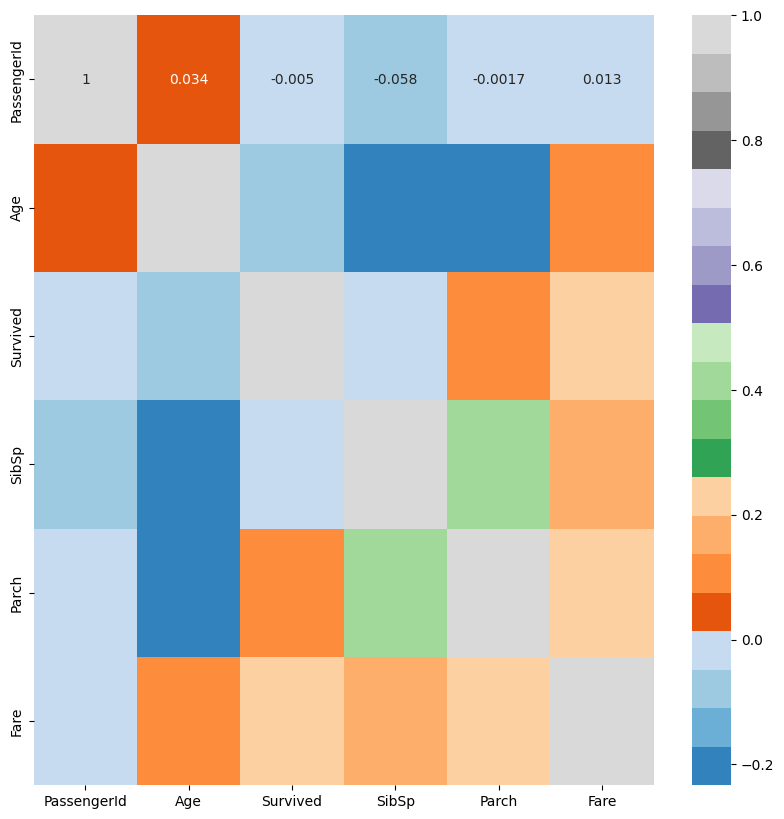

In [227]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_train.corr(), annot=True, cmap="tab20c")
plt.show()

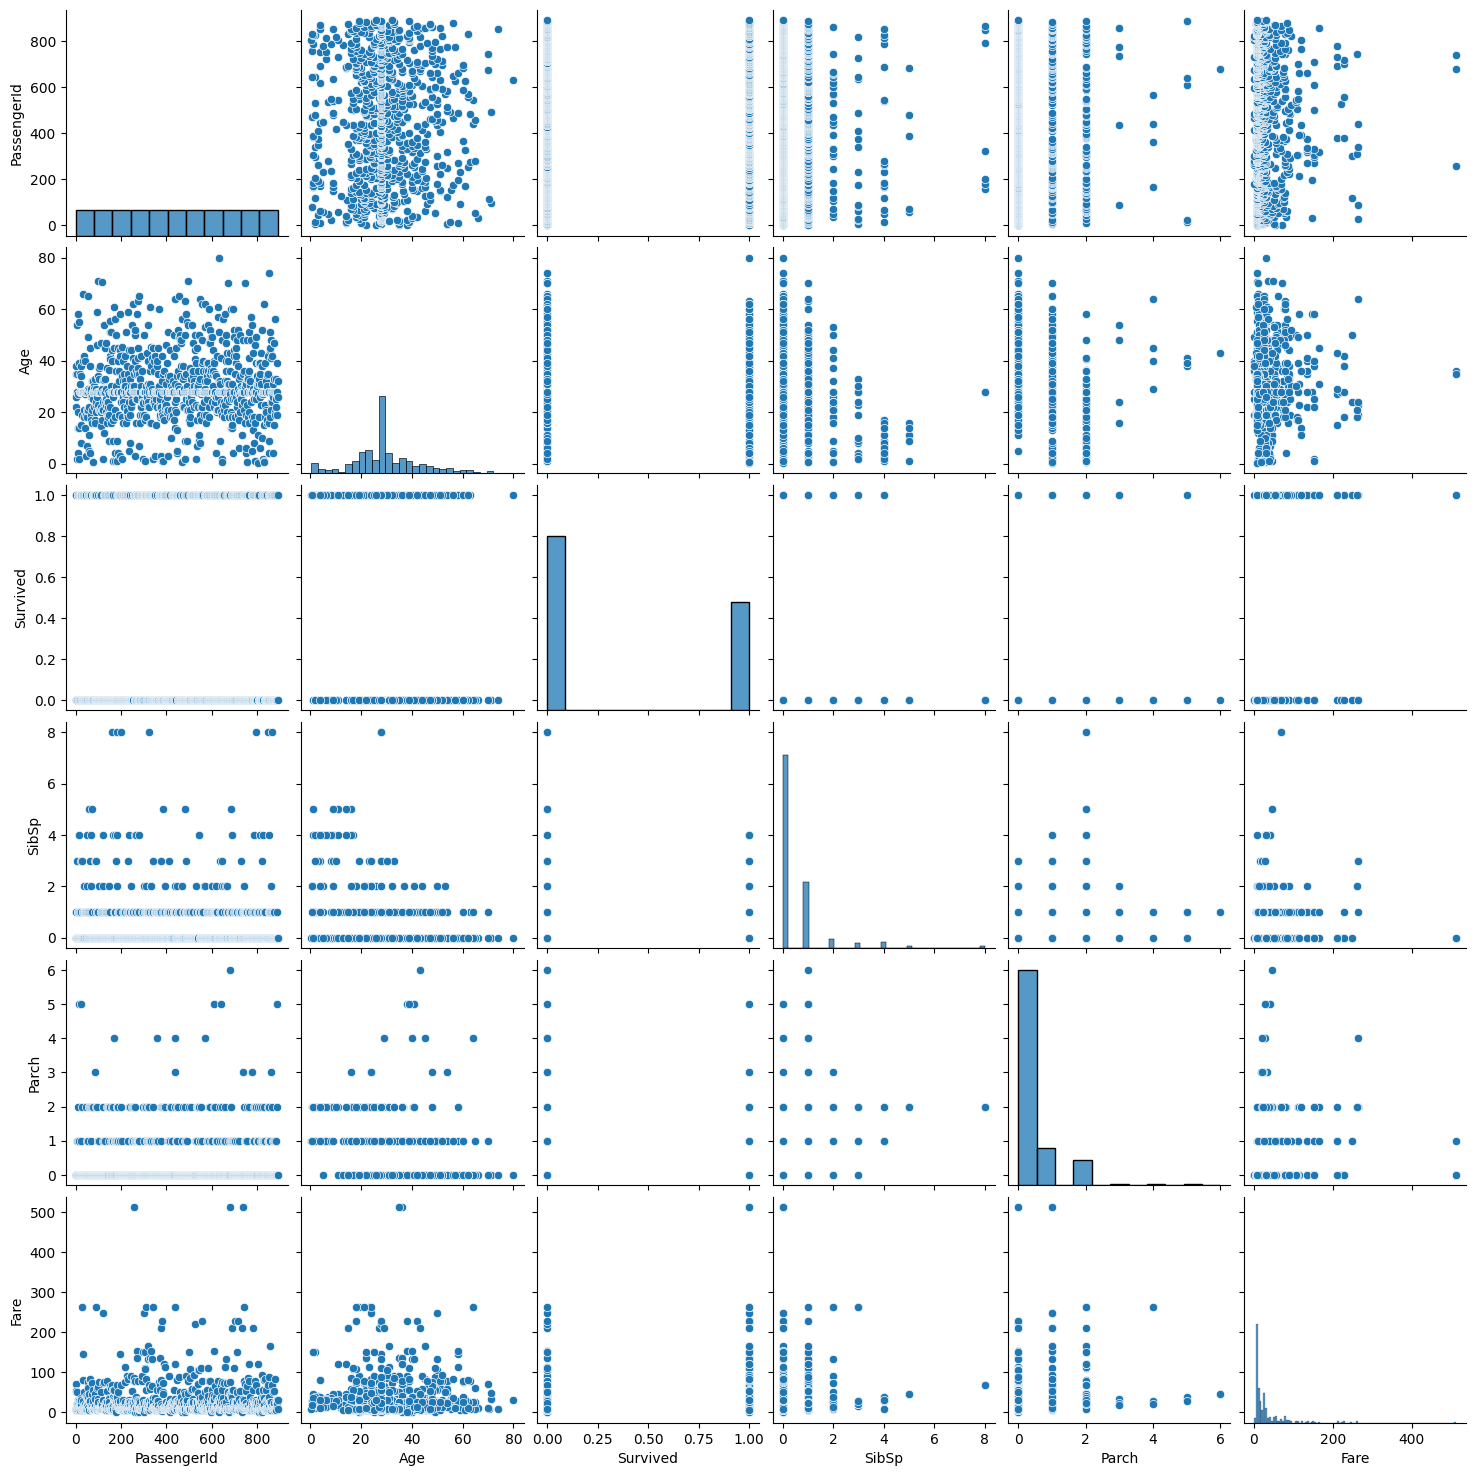

In [228]:
sns.pairplot(train)
plt.show()

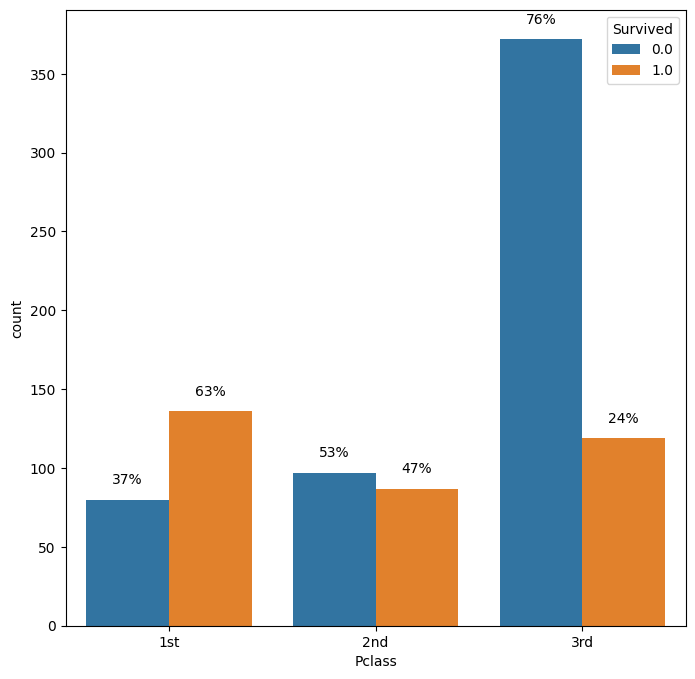

In [229]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Pclass',data=train,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

# Insights
- Total number of people travelled : 891
- Number of People travelled in 1st pclass : 216
- Number of People travelled in 1st pclass & Survived : 136
- Number of People travelled in 1st pclass & Non Survived : 80
- Number of People travelled in 2nd pclass : 184
- Number of People travelled in 2nd pclass & Survived : 86
- Number of People travelled in 2nd pclass & Non Survived : 98
- Number of People travelled in 3rd pclass : 491
- Number of People travelled in 3rd pclass & Survived : 118
- Number of People travelled in 3rd pclass & Non Survived : 373
- Percentage of People Travelling in 1st pclass : 24.24
- Percentage of People Travelling in 2nd pclass : 20.65
- Percentage of People Travelling in 3rd pclass : 55.10
- Percentage of Survial in total Survial if travelling in 1st plass : 39.78
- Percentage of Survial if total Survial travelling in 2nd plass : 25.15
- Percentage of Survial if total Survial travelling in  3rd plass : 34.50
- Percentage of Survial if travelling in 1st plass : 63
- Percentage of Survial if travelling in 2nd plass : 47
- Percentage of Survial if travelling in  3rd plass : 24

- **Premium cost increased the chance of survival in that accident**



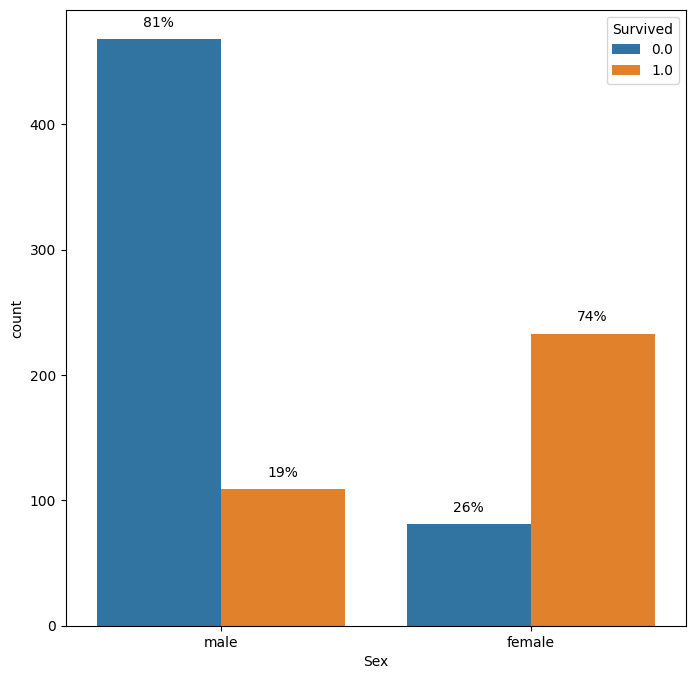

In [230]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Sex',data=train,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

# Insights
- Total number of people travelled : 891
- Number of People travelled were Female : 314
- Number of People travelled were Female & Survived : 232
- Number of People travelled were Female & Non Survived : 82
- Number of People travelled were Male : 577
- Number of People travelled were Male & Survived : 110
- Number of People travelled were Male & Non Survived : 467
- Percentage of People Travelling were Male : 35.24
- Percentage of People Travelling were Female : 64.75
- Percentage of Survial in total Survial if Male : 32.16
- Percentage of Survial in total Survial if Female : 67.83


- **Sex increased the chance of survival in that accident**

# Age

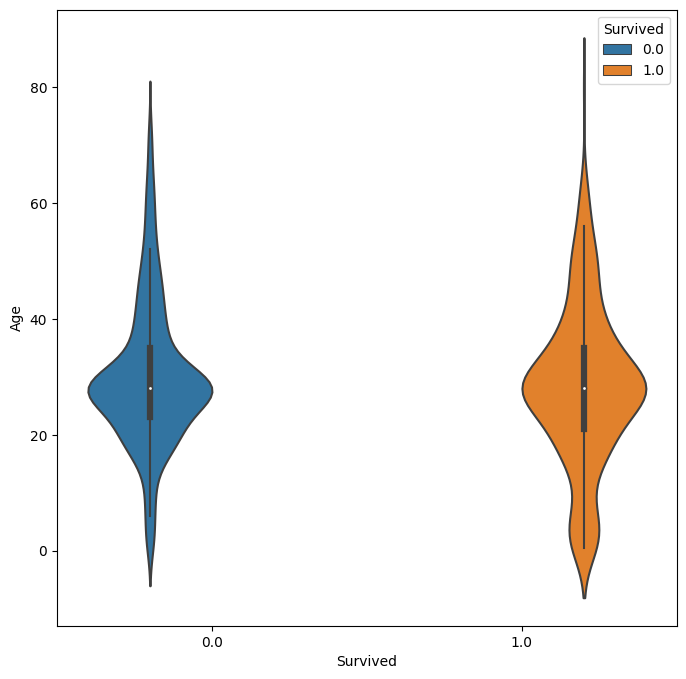

In [231]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Survived',hue='Survived',data=train)
plt.show()

In [232]:
train.Age[train.Survived==1].describe()


count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [233]:
train.Age[train.Survived==0].describe()

count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64

 - Mean Age for people who survived is 28 years, which is less compared with Mean Age for people who didn't survived is 30 years.
 - Median , 75th percentitle is same for both cases

We can create a column 'Family' which will store values of sibsp + parch, 

- sibsp	-> # of siblings / spouses aboard the Titanic	
- parch	-> # of parents / children aboard the Titanic  

& later drop these 2 columns from both dataset for uniformity 

## Add new feature 

In [234]:
train['Family']= train['SibSp']+ train['Parch']+ 1 #including the passenger him/herself
train=train.drop(['SibSp','Parch'],axis=1)
train.head()

,PassengerId,Pclass,Name,Sex,Age,Survived,Ticket,Fare,Cabin,Embarked,Family
0,1,3rd,"Braund, Mr. Owen Harris",male,22.0,0.0,A/5 21171,7.2500,X,Southampton,2
1,2,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,PC 17599,71.2833,C85,Cherbourg,2
2,3,3rd,"Heikkinen, Miss. Laina",female,26.0,1.0,STON/O2. 3101282,7.9250,X,Southampton,1
3,4,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,113803,53.1000,C123,Southampton,2
4,5,3rd,"Allen, Mr. William Henry",male,35.0,0.0,373450,8.0500,X,Southampton,1


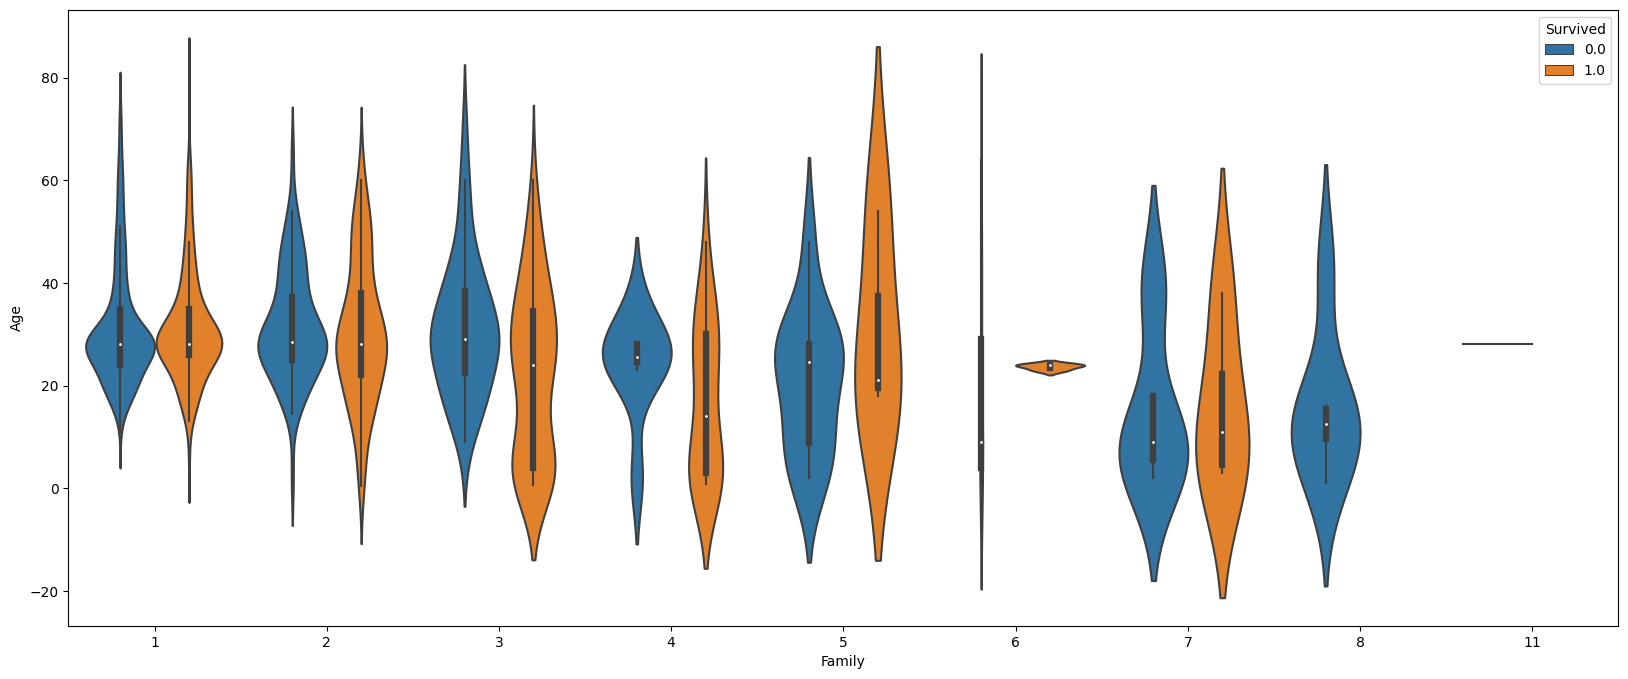

In [235]:
plt.figure(figsize=(20,8))
sns.violinplot(y='Age',x='Family',hue='Survived',data=train)
plt.show()

In [236]:
train.Family[train.Survived==1].describe()

count    342.000000
mean       1.938596
std        1.186076
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Family, dtype: float64

In [237]:
print('Percentage of People Survived with their family member count')
train.Family[train.Survived==1].value_counts()* 100/len(train)

Percentage of People Survived with their family member count


Family
1    18.294052
2     9.988777
3     6.621773
4     2.356902
7     0.448934
6     0.336700
5     0.336700
Name: count, dtype: float64

In [238]:
print('Number of People Survived with their family member count')
train.Family[train.Survived==1].value_counts()

Number of People Survived with their family member count


Family
1    163
2     89
3     59
4     21
7      4
6      3
5      3
Name: count, dtype: int64

In [239]:
print('Perceptage in total Survival with family count as ')
train.Family[train.Survived==1].value_counts()* 100/len(train.Family[train.Survived==1])

Perceptage in total Survival with family count as 


Family
1    47.660819
2    26.023392
3    17.251462
4     6.140351
7     1.169591
6     0.877193
5     0.877193
Name: count, dtype: float64

In [240]:
train.Family[train.Survived==0].describe()

count    549.000000
mean       1.883424
std        1.830669
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family, dtype: float64

In [241]:
print('Perecentage of People Not Survived with their family member count')
train.Family[train.Survived==0].value_counts()* 100/len(train)

Perecentage of People Not Survived with their family member count


Family
1     41.975309
2      8.080808
3      4.826038
6      2.132435
5      1.346801
7      0.897868
4      0.897868
11     0.785634
8      0.673401
Name: count, dtype: float64

In [242]:
print('Perceptage in total Death with family count as ')
train.Family[train.Survived==0].value_counts()* 100/len(train.Family[train.Survived==0])

Perceptage in total Death with family count as 


Family
1     68.123862
2     13.114754
3      7.832423
6      3.460838
5      2.185792
7      1.457195
4      1.457195
11     1.275046
8      1.092896
Name: count, dtype: float64

In [243]:
print('Number of People Not Survived with their family member count')
train.Family[train.Survived==0].value_counts()

Number of People Not Survived with their family member count


Family
1     374
2      72
3      43
6      19
5      12
7       8
4       8
11      7
8       6
Name: count, dtype: int64

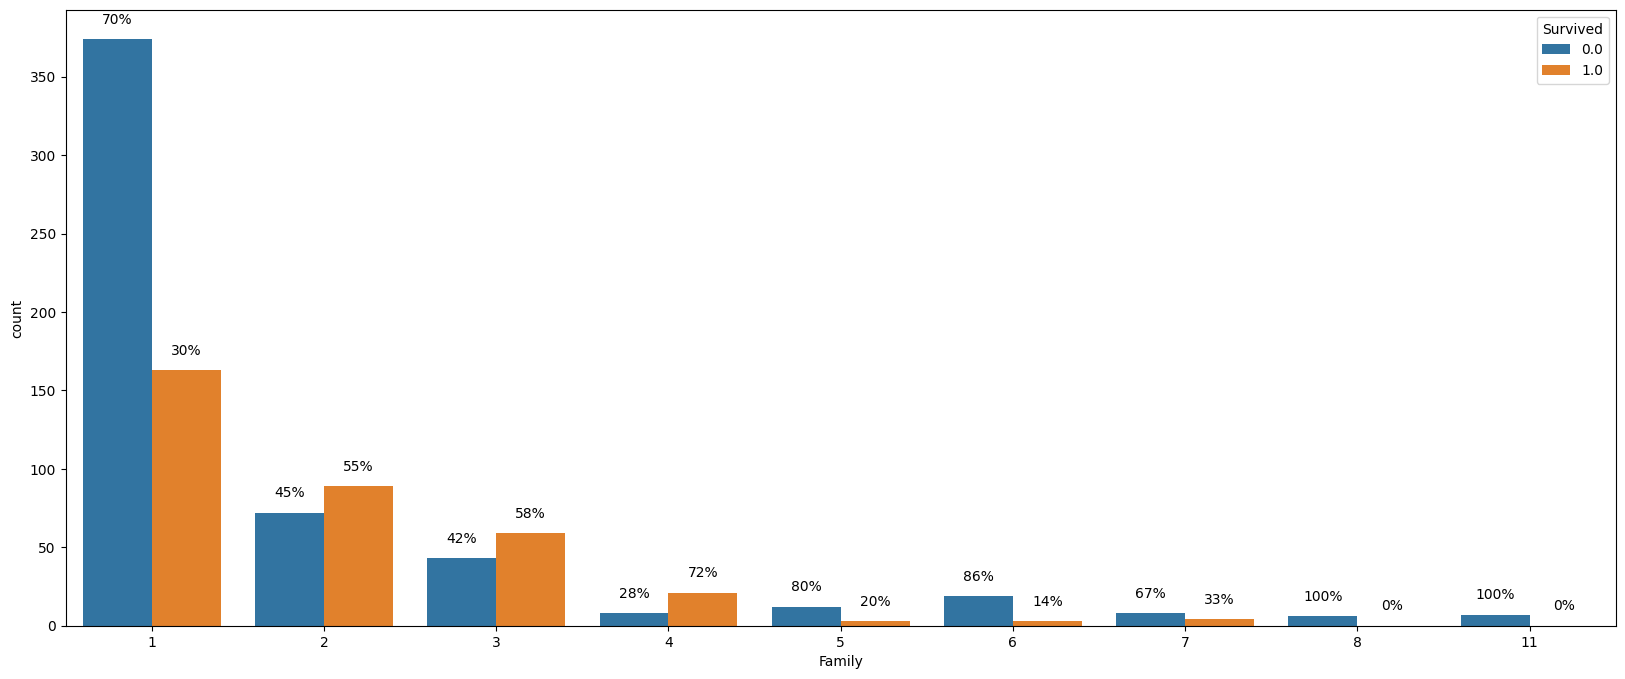

In [244]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Family',data=train,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

- People with  family member count as  2,3,4 has better chance of surviving than people with family member count as  1,5,6,8 & 11
- Single Traveller may be tried to help others , resulting max death in total death i.e. 68%
- Family having members as 8 & 11 died all , may because they were too busy in panic to collect family members before they exit.
- Single Traveller Couple (Family with 2 members), couple with 1 or 2 children survived the most, i.e. 90% of total survival.
- Single Traveller has both Survial & Death when account in total dealth or total survival.


Similarly, For testdata, we perform same action

In [245]:
test['Family']= test['SibSp']+ test['Parch']+ 1 #including the passenger him/herself
test=test.drop(['SibSp','Parch'],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,892,3rd,"Kelly, Mr. James",male,34.5,330911,7.8292,X,Queenstown,1
1,893,3rd,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,X,Southampton,2
2,894,2nd,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,X,Queenstown,1
3,895,3rd,"Wirz, Mr. Albert",male,27.0,315154,8.6625,X,Southampton,1
4,896,3rd,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,X,Southampton,3


# Name & Ticket Number are not an important feature for prediction 

In [246]:
train=train.drop(['Name','Ticket'],axis=1)
train.head()

,PassengerId,Pclass,Sex,Age,Survived,Fare,Cabin,Embarked,Family
0,1,3rd,male,22.0,0.0,7.2500,X,Southampton,2
1,2,1st,female,38.0,1.0,71.2833,C85,Cherbourg,2
2,3,3rd,female,26.0,1.0,7.9250,X,Southampton,1
3,4,1st,female,35.0,1.0,53.1000,C123,Southampton,2
4,5,3rd,male,35.0,0.0,8.0500,X,Southampton,1


Similarly, For testdata, we perform same action

In [247]:
test=test.drop(['Name','Ticket'],axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,892,3rd,male,34.5,7.8292,X,Queenstown,1
1,893,3rd,female,47.0,7.0000,X,Southampton,2
2,894,2nd,male,62.0,9.6875,X,Queenstown,1
3,895,3rd,male,27.0,8.6625,X,Southampton,1
4,896,3rd,female,22.0,12.2875,X,Southampton,3


Fare

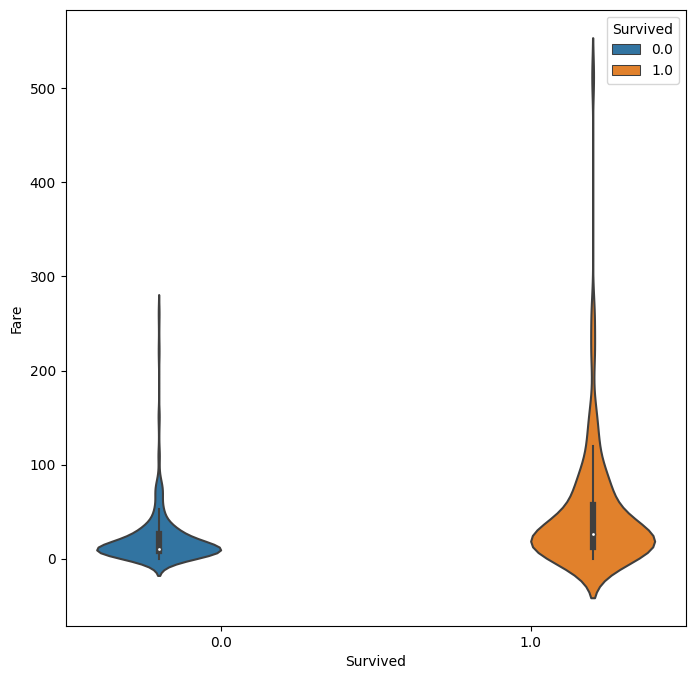

In [248]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Fare',x='Survived',hue='Survived',data=train)
plt.show()

In [249]:
train.Fare[train.Survived==1].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [250]:
train.Fare[train.Survived==0].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

- People who survived has bought a ticket with a mean 48.40 compared to  22.11, who are dead
- People who survived has bought a ticket with a median 26 compared to 10.5, who are dead
- Premium tickets bought safer seat

# Cabin

In [251]:
train.Cabin.value_counts()

Cabin
X                  687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
D                    3
F33                  3
E101                 3
F2                   3
B20                  2
E67                  2
C125                 2
E24                  2
B49                  2
B77                  2
D35                  2
C78                  2
C93                  2
C65                  2
B57 B59 B63 B66      2
B5                   2
E121                 2
B51 B53 B55          2
B18                  2
C124                 2
C126                 2
B35                  2
E44                  2
C92                  2
C68                  2
D20                  2
B22                  2
E25                  2
D36                  2
E8                   2
C83                  2
C2                   2
D17                  2
D26                  2
D33                  2
F G73                2
E33                  2
B28                  2
C52  

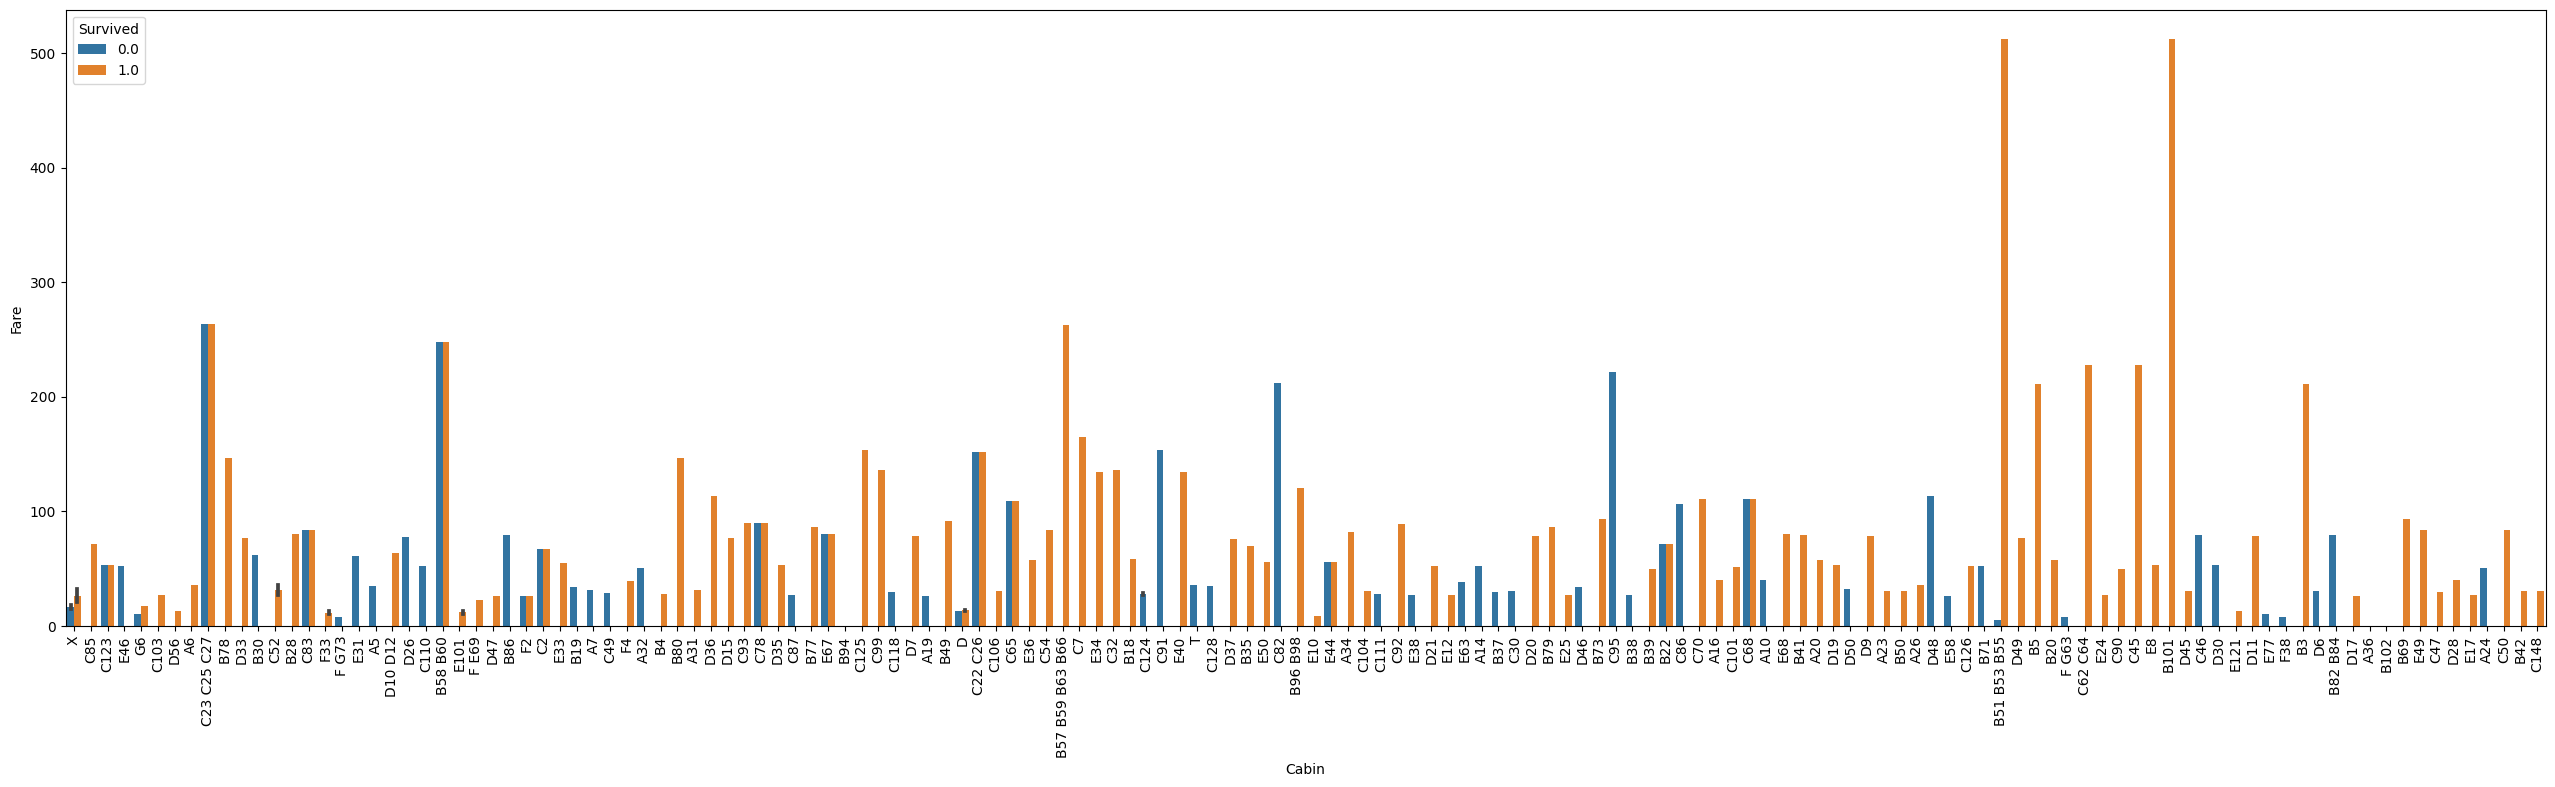

In [252]:
plt.figure(figsize=(32,8))
ax=sns.barplot(x='Cabin',y='Fare',hue='Survived',data=train)
plt.xticks(rotation=90)
plt.show()

In [253]:
train.Cabin[train.Survived==0].value_counts(ascending=False)*100/len(train.Cabin[train.Survived==0])

Cabin
X              87.613843
F G73           0.364299
C22 C26         0.364299
C124            0.364299
D26             0.364299
G6              0.364299
C23 C25 C27     0.364299
C30             0.182149
C65             0.182149
B37             0.182149
E58             0.182149
A14             0.182149
C95             0.182149
B38             0.182149
C86             0.182149
A10             0.182149
D50             0.182149
D48             0.182149
D46             0.182149
B71             0.182149
E38             0.182149
C68             0.182149
F G63           0.182149
C46             0.182149
B22             0.182149
D30             0.182149
E77             0.182149
F38             0.182149
D6              0.182149
B82 B84         0.182149
A36             0.182149
B102            0.182149
A24             0.182149
E63             0.182149
C128            0.182149
C111            0.182149
E44             0.182149
B30             0.182149
C83             0.182149
E31             0.1

In [254]:
train.Cabin[train.Survived==1].value_counts(ascending=False)*100/len(train.Cabin[train.Survived==1])

Cabin
X                  60.233918
B96 B98             1.169591
E101                0.877193
F33                 0.877193
D36                 0.584795
F2                  0.584795
D                   0.584795
E121                0.584795
B20                 0.584795
B18                 0.584795
E33                 0.584795
C93                 0.584795
E8                  0.584795
D35                 0.584795
B77                 0.584795
C125                0.584795
B35                 0.584795
F4                  0.584795
B5                  0.584795
E24                 0.584795
D17                 0.584795
C92                 0.584795
C23 C25 C27         0.584795
B28                 0.584795
C52                 0.584795
D33                 0.584795
D20                 0.584795
B57 B59 B63 B66     0.584795
E25                 0.584795
G6                  0.584795
C126                0.584795
B49                 0.584795
D9                  0.292398
A23                 0.292398
C85     

- 87% of total death toll are from X Cabin , which means they don't had any cabin. They were Class 3 who paid little so, they have no premium service.
- 60% of total Surviour are from X Cabin , which means they don't had any cabin. They were first who got alert and act fastest.
- Luxury brough confort & premium services, same was the reason they were last who were alerted.

# Embarked

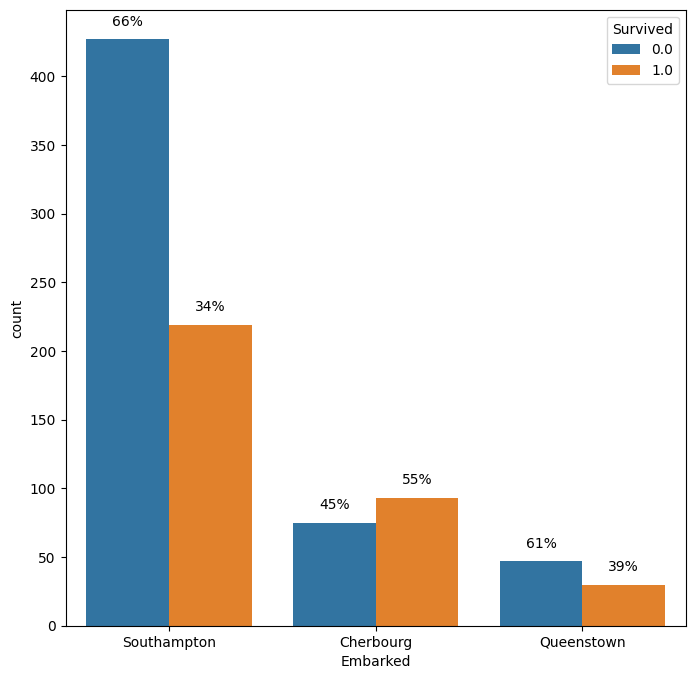

In [255]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Embarked',data=train,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

In [256]:
train.Embarked.value_counts()

Embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [257]:
train.Embarked.value_counts()*100/len(train)

Embarked
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64

In [258]:
train.Embarked[train.Survived==0].value_counts(ascending=False)

Embarked
Southampton    427
Cherbourg       75
Queenstown      47
Name: count, dtype: int64

In [259]:
train.Embarked[train.Survived==0].value_counts(ascending=False)*100/len(train.Embarked[train.Survived==0])

Embarked
Southampton    77.777778
Cherbourg      13.661202
Queenstown      8.561020
Name: count, dtype: float64

In [260]:
train.Embarked[train.Survived==1].value_counts(ascending=False)

Embarked
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64

In [261]:
train.Embarked[train.Survived==1].value_counts(ascending=False)*100/len(train.Embarked[train.Survived==1])

Embarked
Southampton    64.035088
Cherbourg      27.192982
Queenstown      8.771930
Name: count, dtype: float64

- People from Cherbourg have more survial than Deaths
- 72% of poeple have Embarked at Southampton


In [262]:
len(train.Cabin.unique())

148

There 148 unique values for Cabin , this's not important field to be considered. Drop Cabin from both dataset

In [263]:
test=test.drop(['Cabin'],axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3rd,male,34.5,7.8292,Queenstown,1
1,893,3rd,female,47.0,7.0000,Southampton,2
2,894,2nd,male,62.0,9.6875,Queenstown,1
3,895,3rd,male,27.0,8.6625,Southampton,1
4,896,3rd,female,22.0,12.2875,Southampton,3


In [264]:
train=train.drop(['Cabin'],axis=1)
train.head()

,PassengerId,Pclass,Sex,Age,Survived,Fare,Embarked,Family
0,1,3rd,male,22.0,0.0,7.2500,Southampton,2
1,2,1st,female,38.0,1.0,71.2833,Cherbourg,2
2,3,3rd,female,26.0,1.0,7.9250,Southampton,1
3,4,1st,female,35.0,1.0,53.1000,Southampton,2
4,5,3rd,male,35.0,0.0,8.0500,Southampton,1


# Step 3: Feature Scaling

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    category
 2   Sex          891 non-null    object  
 3   Age          891 non-null    float64 
 4   Survived     891 non-null    float64 
 5   Fare         891 non-null    float64 
 6   Embarked     891 non-null    object  
 7   Family       891 non-null    int64   
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 49.9+ KB


In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Age', 'Fare','Family']]= scaler.fit_transform(train[['Age', 'Fare','Family']])
train.head()

,PassengerId,Pclass,Sex,Age,Survived,Fare,Embarked,Family
0,1,3rd,male,-0.565736,0.0,-0.502445,Southampton,0.059160
1,2,1st,female,0.663861,1.0,0.786845,Cherbourg,0.059160
2,3,3rd,female,-0.258337,1.0,-0.488854,Southampton,-0.560975
3,4,1st,female,0.433312,1.0,0.420730,Southampton,0.059160
4,5,3rd,male,0.433312,0.0,-0.486337,Southampton,-0.560975


In [267]:
test[['Age', 'Fare','Family']]= scaler.transform(test[['Age', 'Fare','Family']])
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3rd,male,0.394887,-0.490783,Queenstown,-0.560975
1,893,3rd,female,1.355510,-0.507479,Southampton,0.059160
2,894,2nd,male,2.508257,-0.453367,Queenstown,-0.560975
3,895,3rd,male,-0.181487,-0.474005,Southampton,-0.560975
4,896,3rd,female,-0.565736,-0.401017,Southampton,0.679295


In [268]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(train[['Pclass', 'Sex','Embarked']], drop_first=True)

# Adding the results to the master dataframe
train = pd.concat([train, dummy1], axis=1)
train.head()

,PassengerId,Pclass,Sex,Age,Survived,Fare,Embarked,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,3rd,male,-0.565736,0.0,-0.502445,Southampton,0.059160,False,True,True,False,True
1,2,1st,female,0.663861,1.0,0.786845,Cherbourg,0.059160,False,False,False,False,False
2,3,3rd,female,-0.258337,1.0,-0.488854,Southampton,-0.560975,False,True,False,False,True
3,4,1st,female,0.433312,1.0,0.420730,Southampton,0.059160,False,False,False,False,True
4,5,3rd,male,0.433312,0.0,-0.486337,Southampton,-0.560975,False,True,True,False,True


Drop Already existing Columns 

In [269]:
train=train.drop(['Pclass', 'Sex','Embarked'],axis=1)
train.head()

,PassengerId,Age,Survived,Fare,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,-0.565736,0.0,-0.502445,0.059160,False,True,True,False,True
1,2,0.663861,1.0,0.786845,0.059160,False,False,False,False,False
2,3,-0.258337,1.0,-0.488854,-0.560975,False,True,False,False,True
3,4,0.433312,1.0,0.420730,0.059160,False,False,False,False,True
4,5,0.433312,0.0,-0.486337,-0.560975,False,True,True,False,True


In [270]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(test[['Pclass', 'Sex','Embarked']], drop_first=True)

# Adding the results to the master dataframe
test = pd.concat([test, dummy2], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,892,3rd,male,0.394887,-0.490783,Queenstown,-0.560975,False,True,True,True,False
1,893,3rd,female,1.355510,-0.507479,Southampton,0.059160,False,True,False,False,True
2,894,2nd,male,2.508257,-0.453367,Queenstown,-0.560975,True,False,True,True,False
3,895,3rd,male,-0.181487,-0.474005,Southampton,-0.560975,False,True,True,False,True
4,896,3rd,female,-0.565736,-0.401017,Southampton,0.679295,False,True,False,False,True


In [271]:
test=test.drop(['Pclass', 'Sex','Embarked'],axis=1)
test.head()

,PassengerId,Age,Fare,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,892,0.394887,-0.490783,-0.560975,False,True,True,True,False
1,893,1.355510,-0.507479,0.059160,False,True,False,False,True
2,894,2.508257,-0.453367,-0.560975,True,False,True,True,False
3,895,-0.181487,-0.474005,-0.560975,False,True,True,False,True
4,896,-0.565736,-0.401017,0.679295,False,True,False,False,True


In [272]:
### Checking the Survived Rate
Survived = (sum(train['Survived'])/len(train['Survived'].index))*100
Survived

38.38383838383838

We have almost 38.38% Survived rate

Step 4: Looking at Correlations

In [273]:
train['Survived']=train['Survived'].astype('uint8')

To make sure corr shows correct represtations 

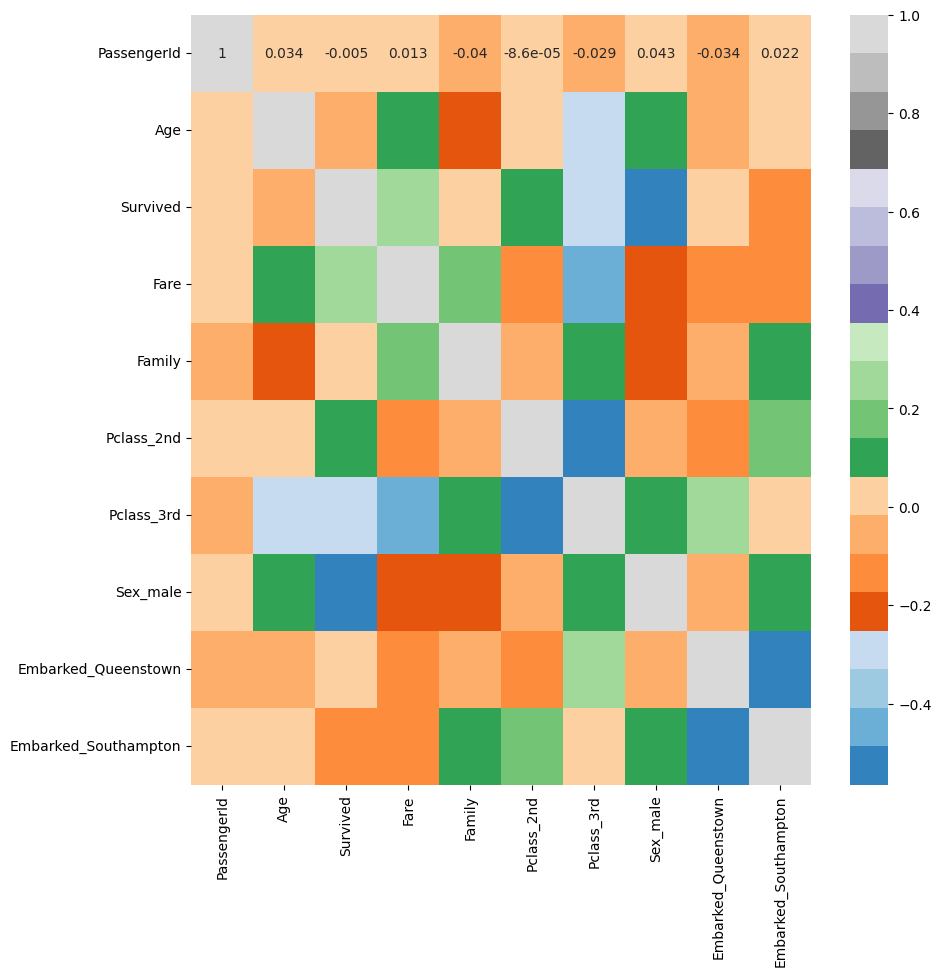

In [274]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))   
sns.heatmap(train.corr(),annot = True,cmap="tab20c")
plt.show()

# Step 5: Model Building

In [275]:
y_train=train.pop('Survived')
X_train=train

In [276]:
X_train.head()

,PassengerId,Age,Fare,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,-0.565736,-0.502445,0.059160,False,True,True,False,True
1,2,0.663861,0.786845,0.059160,False,False,False,False,False
2,3,-0.258337,-0.488854,-0.560975,False,True,False,False,True
3,4,0.433312,0.420730,0.059160,False,False,False,False,True
4,5,0.433312,-0.486337,-0.560975,False,True,True,False,True


In [277]:
# Convert boolean columns to integers (0/1)
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})

# Reset the index (optional, if you want indices starting from 0)
X_train = X_train.reset_index(drop=True)
# Display the transformed DataFrame
print(X_train.head())

   PassengerId       Age      Fare    Family  Pclass_2nd  Pclass_3rd  \
0            1 -0.565736 -0.502445  0.059160           0           1   
1            2  0.663861  0.786845  0.059160           0           0   
2            3 -0.258337 -0.488854 -0.560975           0           1   
3            4  0.433312  0.420730  0.059160           0           0   
4            5  0.433312 -0.486337 -0.560975           0           1   

   Sex_male  Embarked_Queenstown  Embarked_Southampton  
0         1                    0                     1  
1         0                    0                     0  
2         0                    0                     1  
3         0                    0                     1  
4         1                    0                     1  


In [278]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: uint8

In [279]:
print(X_train.dtypes,"\n\n")
print(y_train.dtypes)

PassengerId               int64
Age                     float64
Fare                    float64
Family                  float64
Pclass_2nd                int32
Pclass_3rd                int32
Sex_male                  int32
Embarked_Queenstown       int32
Embarked_Southampton      int32
dtype: object 


uint8


In [280]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.25
Date:                Thu, 05 Dec 2024   Deviance:                       786.51
Time:                        09:32:50   Pearson chi2:                     902.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3618
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7645      0.349      7.915      0.000       2.080       3.449
PassengerId              0.0001      0.000      0.375      0.707      -0.001       0.001
Age                     -0.4933      0.102     -4.835      0.000      -0.693      -0.293
Fare                     0.1262      0.124      1.021      0.307      -0.116       0.368
Family                  -0.3546      0.110     -3.225      0.001      -0.570      -0.139
Pclass_2nd              -0.8950      0.296     -3.019      0.003      -1.476      -0.314
Pclass_3rd              -2.1284      0.297     -7.157      0.000      -2.711      -1.546
Sex_male                -2.7415      0.201    -13.664      0.000      -3.135      -2.348
Embarked_Queenstown     -0.0837      0.380     -0.220      0.826      -0.828       0.661
Embarked_Southampton    -0.4500      0.239     -1.881      0.060      -0.919       0.019
========================================================================================
"""

# Step 5: Feature Selection Using RFE

In [281]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create a logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model and desired number of features
rfe = RFE(estimator=logreg, n_features_to_select=5)

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)

# Print the selected features
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)


Selected features: [False  True False False  True  True  True False  True]
Feature ranking: [5 1 3 2 1 1 1 4 1]


In [283]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PassengerId', False, 5),
 ('Age', True, 1),
 ('Fare', False, 3),
 ('Family', False, 2),
 ('Pclass_2nd', True, 1),
 ('Pclass_3rd', True, 1),
 ('Sex_male', True, 1),
 ('Embarked_Queenstown', False, 4),
 ('Embarked_Southampton', True, 1)]

In [284]:
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Embarked_Southampton'], dtype='object')

In [285]:
X_train.columns[~rfe.support_]

Index(['PassengerId', 'Fare', 'Family', 'Embarked_Queenstown'], dtype='object')

In [286]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.17
Date:                Thu, 05 Dec 2024   Deviance:                       798.34
Time:                        09:35:32   Pearson chi2:                     936.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3533
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8629      0.266     10.775      0.000       2.342       3.384
Age                     -0.4277      0.096     -4.439      0.000      -0.617      -0.239
Pclass_2nd              -0.9613      0.263     -3.657      0.000      -1.477      -0.446
Pclass_3rd              -2.2947      0.243     -9.452      0.000      -2.771      -1.819
Sex_male                -2.5780      0.187    -13.758      0.000      -2.945      -2.211
Embarked_Southampton    -0.5369      0.200     -2.685      0.007      -0.929      -0.145
========================================================================================
"""

In [287]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.090735
1    0.929498
2    0.535391
3    0.894793
4    0.061113
5    0.122931
6    0.256968
7    0.161467
8    0.527207
9    0.917320
dtype: float64

In [288]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09073465, 0.92949783, 0.53539116, 0.89479274, 0.06111293,
       0.12293146, 0.25696827, 0.16146703, 0.52720674, 0.91731961])

In [289]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,0,0.090735,0
1,1,0.929498,1
2,1,0.535391,2
3,1,0.894793,3
4,0,0.061113,4


Creating new column 'predicted' with 1 if Survived_Prob > 0.5 else 0

In [290]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,0,0.090735,0,0
1,1,0.929498,1,1
2,1,0.535391,2,1
3,1,0.894793,3,1
4,0,0.061113,4,0


In [291]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[463  86]
 [101 241]]


In [292]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.7901234567901234


### Checking VIFs

In [293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Embarked_Southampton,3.08
2,Pclass_3rd,2.71
3,Sex_male,2.60
1,Pclass_2nd,1.67
0,Age,1.12


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

Metrics beyond simply accuracy

In [294]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [295]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7046783625730995

In [296]:
# Let us calculate specificity
TN / float(TN+FP)

0.843351548269581

In [297]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.15664845173041894


In [298]:
# positive predictive value 
print (TP / float(TP+FP))

0.7370030581039755


In [299]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8209219858156028


# Step 6: Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [300]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [301]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

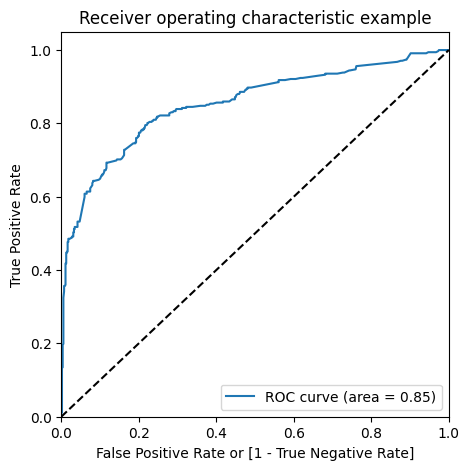

In [302]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

# Step 7: Finding Optimal Cutoff Point

In [303]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.090735,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.929498,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.535391,2,1,1,1,1,1,1,1,0,0,0,0
3,1,0.894793,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.061113,4,0,1,0,0,0,0,0,0,0,0,0


In [304]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.586981  0.923977  0.377049
0.2   0.2  0.698092  0.856725  0.599271
0.3   0.3  0.759820  0.821637  0.721311
0.4   0.4  0.787879  0.783626  0.790528
0.5   0.5  0.790123  0.704678  0.843352
0.6   0.6  0.809203  0.622807  0.925319
0.7   0.7  0.790123  0.502924  0.969035
0.8   0.8  0.754209  0.377193  0.989071
0.9   0.9  0.689113  0.195906  0.996357


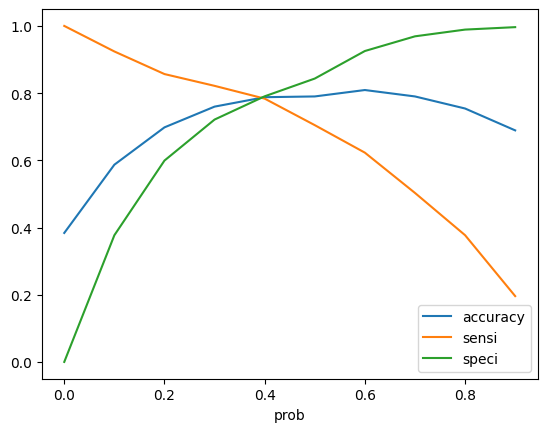

In [305]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [306]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.090735,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.929498,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.535391,2,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.894793,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.061113,4,0,1,0,0,0,0,0,0,0,0,0,0


In [307]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7856341189674523

In [308]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[428, 121],
       [ 70, 272]], dtype=int64)

In [309]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [310]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7953216374269005

In [311]:
# Let us calculate specificity
TN / float(TN+FP)

0.7795992714025501

In [312]:
# Calculate false postive rate - predicting Survived when customer does not have Survived
print(FP/ float(TN+FP))

0.2204007285974499


In [313]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6921119592875318


In [314]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8594377510040161


# Precision and Recall

In [315]:
#Looking at the confusion matrix again

In [316]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
confusion

array([[463,  86],
       [101, 241]], dtype=int64)

Using sklearn utilities for the same

In [317]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Survived, y_train_pred_final.predicted)

0.7370030581039755

In [318]:
recall_score(y_train_pred_final.Survived, y_train_pred_final.predicted)

0.7046783625730995

## Precision and recall tradeoff

In [319]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: uint8

In [320]:
y_train_pred_final.predicted.head()

0    0
1    1
2    1
3    1
4    0
Name: predicted, dtype: int64

In [321]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

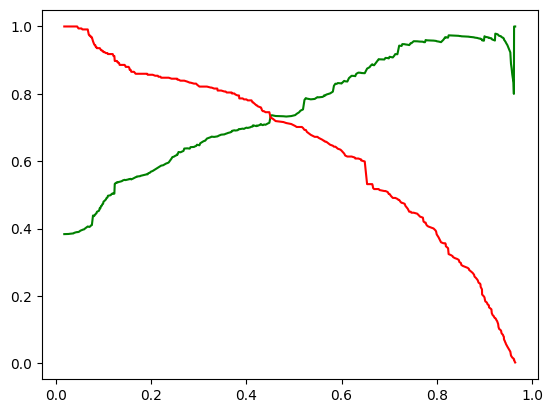

In [322]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [323]:
X_test = test[col]
X_test.head()

,Age,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Southampton
0,0.394887,False,True,True,False
1,1.355510,False,True,False,True
2,2.508257,True,False,True,False
3,-0.181487,False,True,True,True
4,-0.565736,False,True,False,True


In [324]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Age,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Southampton
0,1.0,0.394887,False,True,True,False
1,1.0,1.355510,False,True,False,True
2,1.0,2.508257,True,False,True,False
3,1.0,-0.181487,False,True,True,True
4,1.0,-0.565736,False,True,False,True


In [327]:
X_test_sm = X_test_sm.astype({col: 'int' for col in X_test_sm.select_dtypes(include=['bool']).columns})


In [328]:
y_test_pred = res.predict(X_test_sm)

In [329]:
y_test_pred[:10]

0    0.101689
1    0.366233
2    0.148158
3    0.078058
4    0.567896
5    0.114888
6    0.633503
7    0.249207
8    0.719439
9    0.093483
dtype: float64

In [330]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
0,0.101689
1,0.366233
2,0.148158
3,0.078058
4,0.567896


In [331]:
y_pred_final= y_pred_1
y_pred_final.head()

,0
0,0.101689
1,0.366233
2,0.148158
3,0.078058
4,0.567896


In [332]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

In [333]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Survived_Prob
0,0.101689
1,0.366233
2,0.148158
3,0.078058
4,0.567896


In [334]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [335]:
y_pred_final.head()

,Survived_Prob,final_predicted
0,0.101689,0
1,0.366233,0
2,0.148158,0
3,0.078058,0
4,0.567896,1


In [337]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_final["final_predicted"]
    })
submission.to_csv('titanic_pred.csv', index=False)